# **Data Acquisition e Data Wrangling**

## **Exercício 1:**
Ler os dados do banco **nba_salary.sqlite**. Extrair ambas as tabelas.

## **Exercício 2:**
Verificar quantos dados nulos estão presentes em cada tabela. 
Analisar quais colunas e linhas você eliminaria. 
Se possível aplique alguma técnica de imputação

## **Exercício 3:**
Da tabela de **Seasons_Stats**, selecione apenas o ano 2017. 
Analisar porque vários jogadores aparecem várias vezes em um mesmo ano. 
O mesmo para a tabela **From NBA_season1718_salary**.

1. Ler os dados do banco nba_salary.sqlite. Extrair ambas as tabelas.

In [13]:
import os
import pandas as pd
import sqlalchemy as db
from dotenv import load_dotenv

In [20]:
load_dotenv()
caminho = os.getenv('DIRETORIO2')
nome_arquivo = 'nba_salary.sqlite'
arquivo = os.path.join(caminho, nome_arquivo)

engine = db.create_engine('sqlite:///' + arquivo)
connection = engine.connect()

In [22]:
# AS TABELAS
NBA_season1718_salary = "SELECT * FROM NBA_season1718_salary"
Seasons_Stats = "SELECT * FROM Seasons_Stats"

In [24]:
df_nba_season = pd.read_sql_query(
    NBA_season1718_salary,
    connection
)
df_nba_season

,X1,Player,Tm,season17_18
0,1.0,Stephen Curry,GSW,34682550.0
1,2.0,LeBron James,CLE,33285709.0
2,3.0,Paul Millsap,DEN,31269231.0
3,4.0,Gordon Hayward,BOS,29727900.0
4,5.0,Blake Griffin,DET,29512900.0
...,...,...,...,...
568,569.0,Quinn Cook,NOP,25000.0
569,570.0,Chris Johnson,HOU,25000.0
570,571.0,Beno Udrih,DET,25000.0
571,572.0,Joel Bolomboy,MIL,22248.0


In [73]:
df_seasons_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      24691 non-null  float64
 1   Year    24624 non-null  float64
 2   Player  24624 non-null  object 
 3   Pos     24624 non-null  object 
 4   Age     24616 non-null  float64
 5   Tm      24624 non-null  object 
 6   G       24624 non-null  float64
 7   GS      6247 non-null   float64
 8   MP      24138 non-null  float64
 9   PER     24101 non-null  float64
 10  TS%     24538 non-null  float64
 11  3PAr    3452 non-null   float64
 12  FTr     24525 non-null  float64
 13  ORB%    977 non-null    float64
 14  DRB%    371 non-null    float64
 15  TRB%    255 non-null    float64
 16  AST%    765 non-null    float64
 17  STL%    2019 non-null   float64
 18  BLK%    3039 non-null   float64
 19  TOV%    450 non-null    float64
 20  USG%    58 non-null     float64
 21  blanl   0 non-null      object 
 22

In [74]:
df_seasons_stats.describe()

,X1,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24691.000000,24624.000000,24616.000000,24624.000000,6247.000000,24138.000000,24101.000000,24538.000000,3452.000000,24525.000000,...,23766.000000,1533.000000,735.000000,24312.000000,24624.000000,1897.000000,3691.000000,930.000000,24624.000000,24624.000000
mean,12345.000000,1992.594989,26.664405,50.837110,0.173203,1209.720317,12.479071,0.493001,0.008401,0.325455,...,0.719279,0.437052,0.489796,224.637381,114.852623,0.406431,0.381198,0.448387,116.339222,510.116350
std,7127.822084,17.429594,3.841892,26.496161,0.378453,941.146575,6.039014,0.094469,0.091284,0.218971,...,0.141824,0.496184,0.500236,228.190203,135.863913,0.491296,0.485747,0.497597,84.791873,492.922981
min,0.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6172.500000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.000000,0.208000,...,0.657000,0.000000,0.000000,51.000000,19.000000,0.000000,0.000000,0.000000,39.000000,106.000000
50%,12345.000000,1996.000000,26.000000,58.000000,0.000000,1053.000000,12.700000,0.506000,0.000000,0.296000,...,0.743000,0.000000,0.000000,159.000000,68.000000,0.000000,0.000000,0.000000,109.000000,364.000000
75%,18517.500000,2007.000000,29.000000,75.000000,0.000000,1971.000000,15.600000,0.544000,0.000000,0.400000,...,0.808000,1.000000,1.000000,322.000000,160.000000,1.000000,1.000000,1.000000,182.000000,778.000000
max,24690.000000,2017.000000,44.000000,88.000000,1.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,...,1.000000,1.000000,1.000000,2149.000000,1164.000000,1.000000,1.000000,1.000000,386.000000,4029.000000


In [26]:
df_seasons_stats = pd.read_sql_query(
    Seasons_Stats,
    connection
)
df_seasons_stats

,X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1.0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2.0,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3.0,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4.0,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686.0,2017.0,Cody Zeller,PF,24.0,CHO,62.0,NaN,1725.0,16.7,...,0.679,NaN,NaN,405.0,99.0,NaN,NaN,NaN,189.0,639.0
24687,24687.0,2017.0,Tyler Zeller,C,27.0,BOS,51.0,NaN,525.0,13.0,...,0.564,NaN,NaN,124.0,42.0,NaN,NaN,NaN,61.0,178.0
24688,24688.0,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,NaN,NaN,35.0,4.0,NaN,NaN,NaN,17.0,23.0
24689,24689.0,2017.0,Paul Zipser,SF,22.0,CHI,44.0,NaN,843.0,6.9,...,0.775,NaN,NaN,125.0,36.0,NaN,NaN,NaN,78.0,240.0


2. Verificar quantos dados nulos estão presentes em cada tabela. Analisar quais colunas e linhas você eliminaria. Se possível aplique alguma técnica de imputação

In [27]:
# df_nba_season campos em que tem  dados nulos
df_nba_season.isnull().sum()

X1             0
Player         0
Tm             0
season17_18    0
dtype: int64

In [31]:
# df_seasons_stats campos em que tem dados nulos
df_seasons_stats.isnull().sum()

X1            0
Year         67
Player       67
Pos          67
Age          75
Tm           67
G            67
GS        18444
MP          553
PER         590
TS%         153
3PAr      21239
FTr         166
ORB%      23714
DRB%      24320
TRB%      24436
AST%      23926
STL%      22672
BLK%      21652
TOV%      24241
USG%      24633
blanl     24691
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24691
OBPM      24191
DBPM      23975
BPM       24279
VORP      21604
FG           67
FGA          67
FG%         166
3P        16021
3PA       19516
3P%       20893
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         925
ORB       23158
DRB       23956
TRB         379
AST          67
STL       22794
BLK       21000
TOV       23761
PF           67
PTS          67
dtype: int64

In [29]:
df_seasons_stats.shape

(24691, 53)

<Axes: >

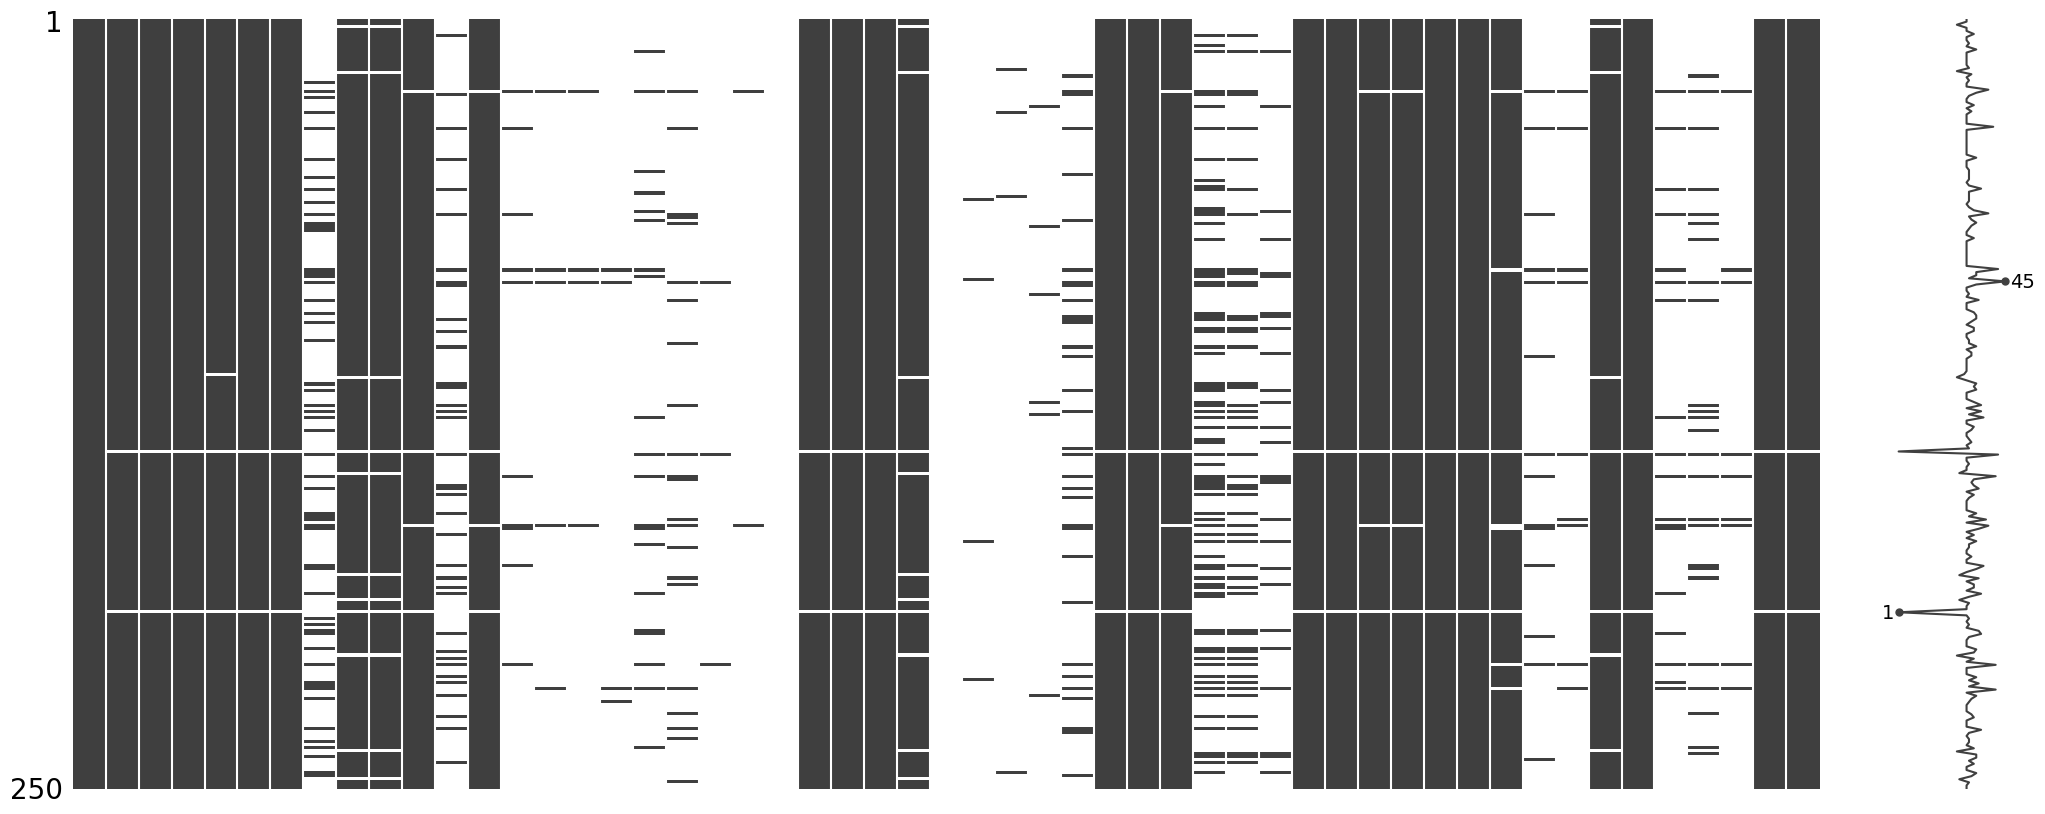

In [35]:
import missingno as msno
%matplotlib inline
msno.matrix(df_seasons_stats.sample(250))

Ao fazer o ```df_seasons_stats.isnull().sum()``` verifiquei que tinham colunas, que estavam todas sem nenhuma linha de dados. Então decidir remover essas colunas e também colunas que valores do tipo objeto

In [56]:
# Excluíndo colunas
df_seasons_stats_colunas_excluido = df_seasons_stats.drop(
    columns=[        
        'GS',
        '3PAr',
        'Player',
        'Pos',
        'Tm',
        'ORB%',
        'DRB%',
        'TRB%',
        'AST%',
        'STL%',
        'BLK%',
        'TOV%',
        'USG%',
        'blanl',
        'blank2',
        'OBPM',
        'DBPM',
        'BPM',
        'VORP',
        '3P',
        '3PA',
        '3P%',
        'ORB',
        'DRB',
        'STL',
        'BLK',
        'TOV',
    ],
    index=0
)

In [57]:
df_seasons_stats_colunas_excluido.isnull().sum()

X1         0
Year      67
Age       75
G         67
MP       552
PER      589
TS%      153
FTr      166
OWS      106
DWS      106
WS       106
WS/48    589
FG        67
FGA       67
FG%      166
2P        67
2PA       67
2P%      195
eFG%     166
FT        67
FTA       67
FT%      925
TRB      378
AST       67
PF        67
PTS       67
dtype: int64

<Axes: >

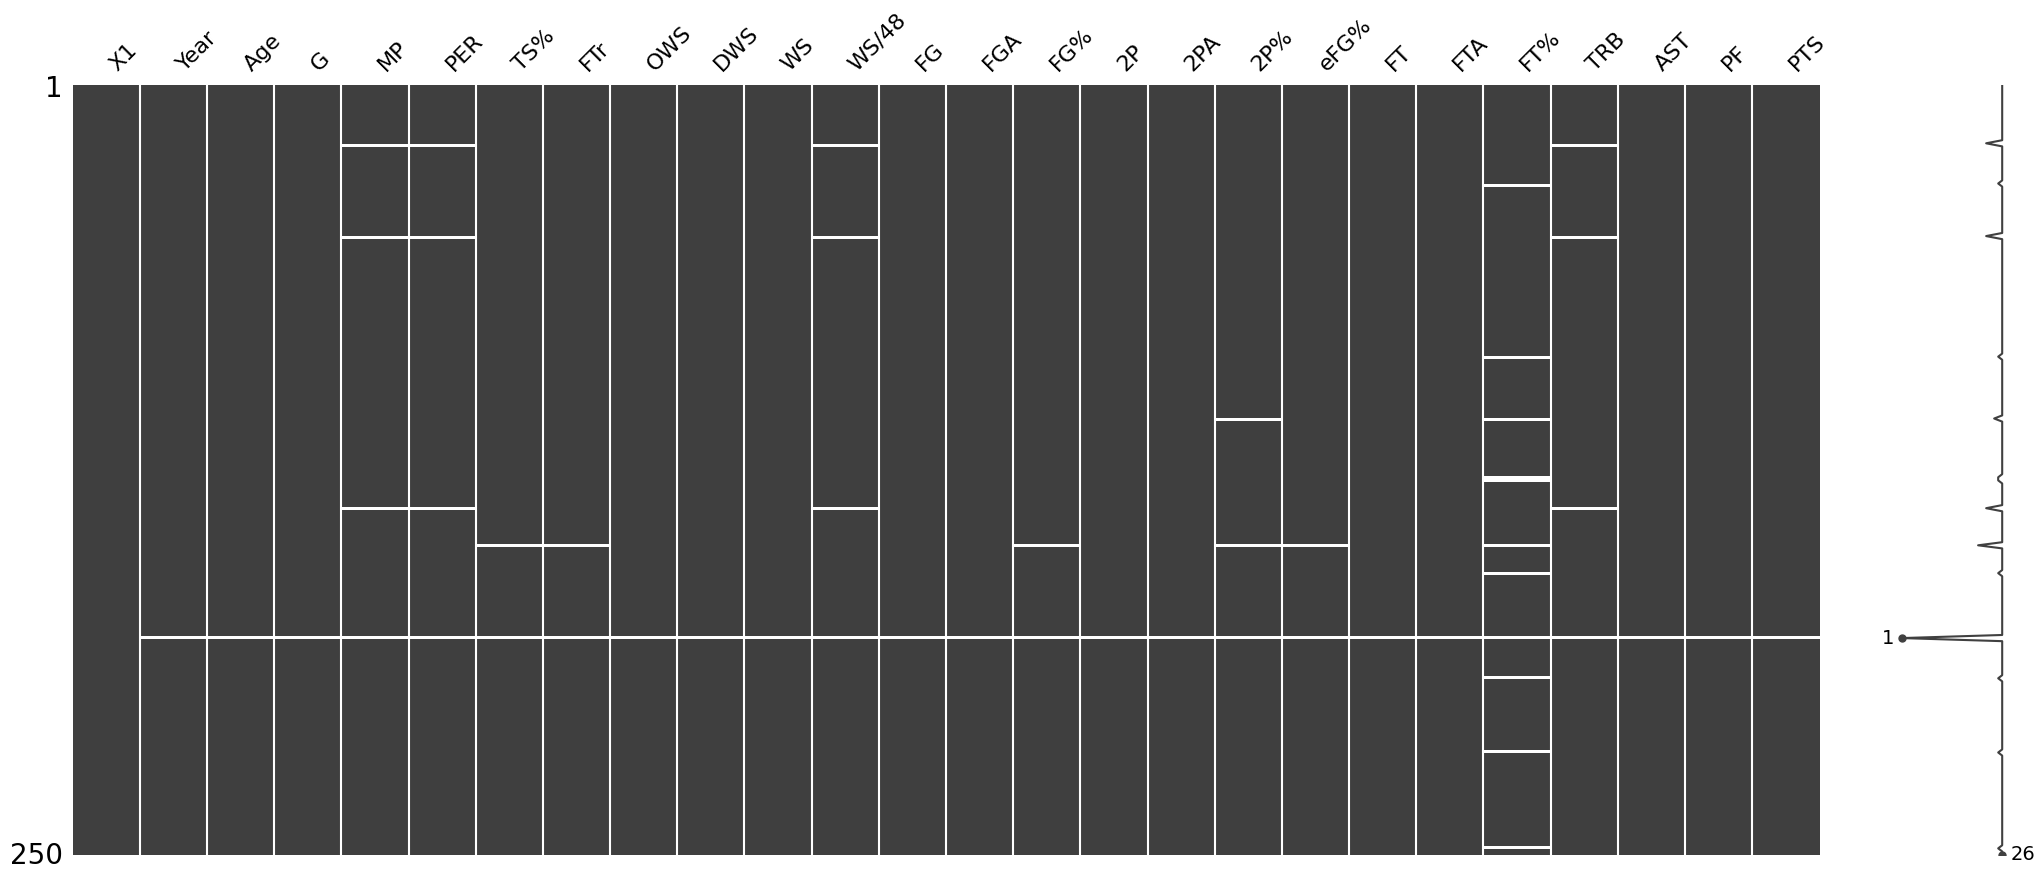

In [58]:
%matplotlib inline
msno.matrix(df_seasons_stats_colunas_excluido.sample(250))

In [66]:
# Usando Nearest Neighbors Imputation
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights='uniform')

In [65]:
df_seasons_stats_final = imputer.fit_transform(df_seasons_stats_colunas_excluido)
df_seasons_stats_final = pd.DataFrame(
    df_seasons_stats_final, columns=df_seasons_stats_colunas_excluido.columns
)
df_seasons_stats_final

,X1,Year,Age,G,MP,PER,TS%,FTr,OWS,DWS,...,2PA,2P%,eFG%,FT,FTA,FT%,TRB,AST,PF,PTS
0,1.0,1950.0,29.0,49.0,1064.5,10.15,0.435,0.387,1.6,0.6,...,274.0,0.372,0.372,75.0,106.0,0.708,80.0,109.0,99.0,279.0
1,2.0,1950.0,25.0,67.0,1382.0,12.60,0.394,0.259,0.9,2.8,...,499.0,0.349,0.349,90.0,129.0,0.698,325.5,140.0,192.0,438.0
2,3.0,1950.0,24.0,15.0,129.0,3.60,0.312,0.395,-0.5,-0.1,...,86.0,0.256,0.256,19.0,34.0,0.559,54.0,20.0,29.0,63.0
3,4.0,1950.0,24.0,13.0,129.0,3.60,0.308,0.378,-0.5,-0.1,...,82.0,0.256,0.256,17.0,31.0,0.548,54.0,20.0,27.0,59.0
4,5.0,1950.0,24.0,2.0,86.0,4.45,0.376,0.750,0.0,0.0,...,4.0,0.250,0.250,2.0,3.0,0.667,13.5,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24685,24686.0,2017.0,24.0,62.0,1725.0,16.70,0.604,0.442,3.4,2.2,...,442.0,0.572,0.571,133.0,196.0,0.679,405.0,99.0,189.0,639.0
24686,24687.0,2017.0,27.0,51.0,525.0,13.00,0.508,0.247,0.5,0.6,...,157.0,0.497,0.494,22.0,39.0,0.564,124.0,42.0,61.0,178.0
24687,24688.0,2017.0,20.0,19.0,108.0,7.30,0.346,0.161,-0.1,0.1,...,31.0,0.323,0.323,3.0,5.0,0.600,35.0,4.0,17.0,23.0
24688,24689.0,2017.0,22.0,44.0,843.0,6.90,0.503,0.181,-0.3,0.8,...,122.0,0.451,0.473,31.0,40.0,0.775,125.0,36.0,78.0,240.0


In [67]:
df_seasons_stats_final.isnull().sum()

X1       0
Year     0
Age      0
G        0
MP       0
PER      0
TS%      0
FTr      0
OWS      0
DWS      0
WS       0
WS/48    0
FG       0
FGA      0
FG%      0
2P       0
2PA      0
2P%      0
eFG%     0
FT       0
FTA      0
FT%      0
TRB      0
AST      0
PF       0
PTS      0
dtype: int64

<Axes: >

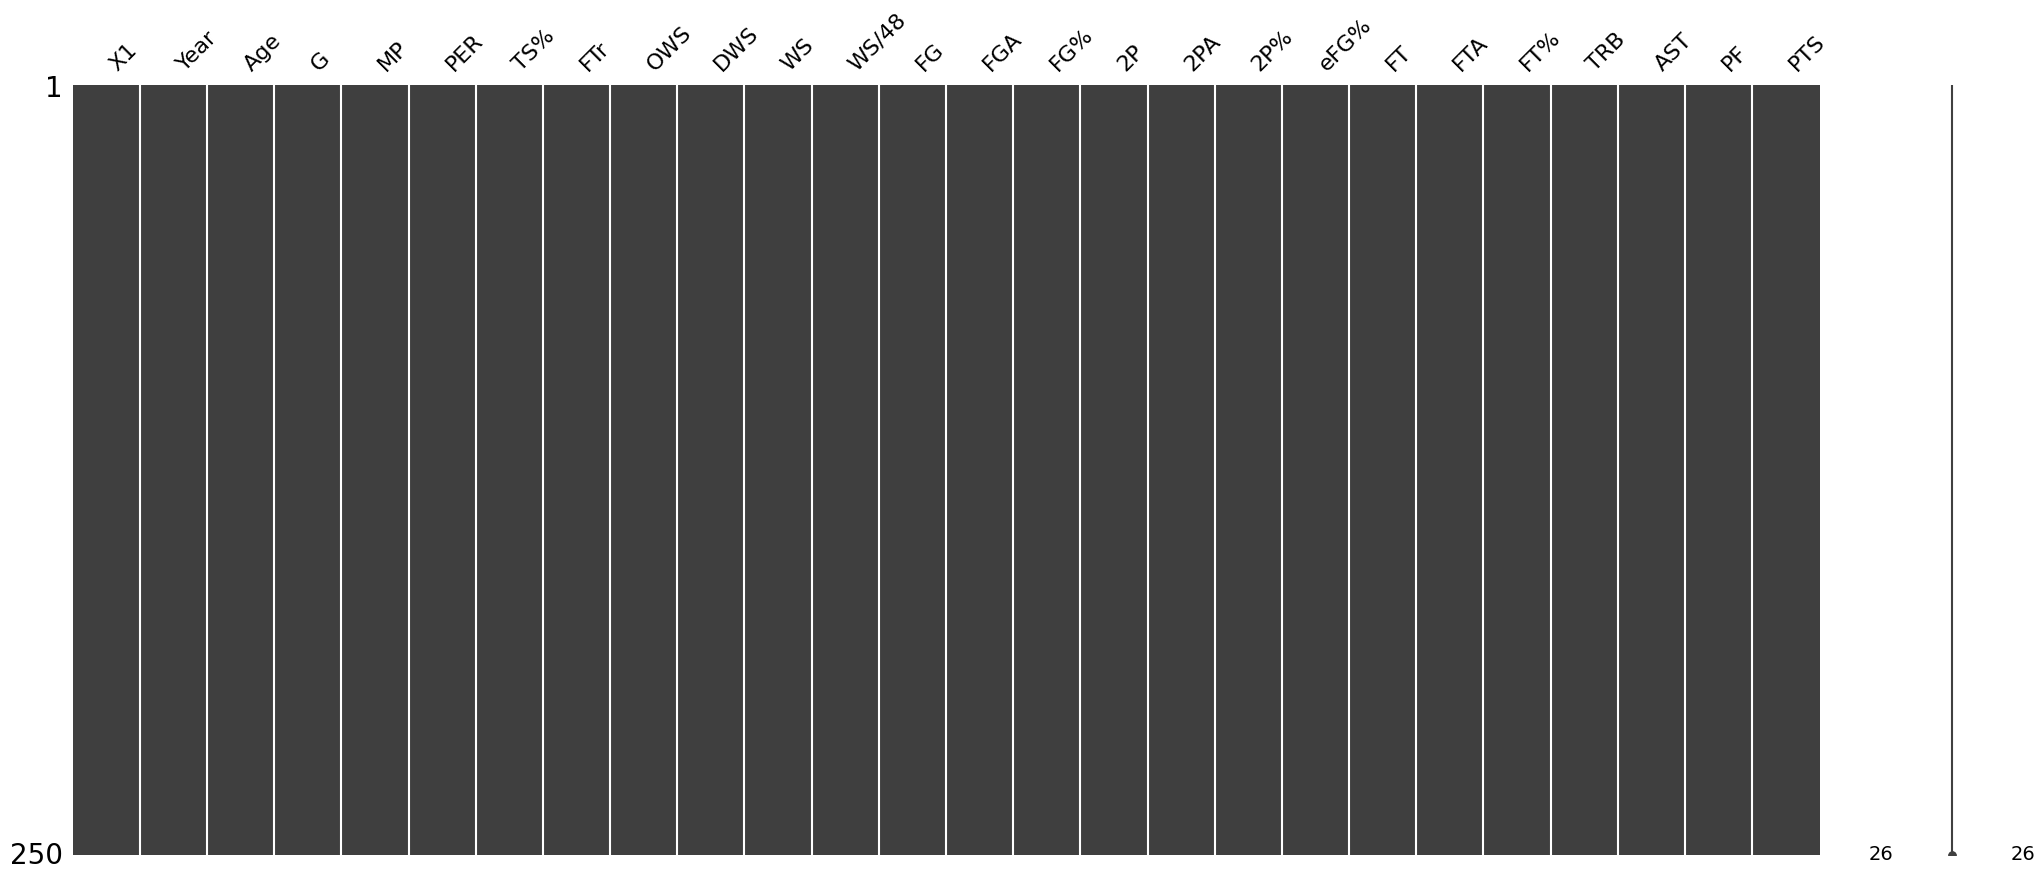

In [69]:
%matplotlib inline
msno.matrix(df_seasons_stats_final.sample(250))